In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('iris.csv')
df.head() #visualising top 5 rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum() #Cehcking null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.Species.unique() #UNIQUE observations in target column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.info() #seeing the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe() #5=point summary

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species']=df['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})

In [9]:
x=df.drop(['Id','Species'],axis=1)
y=df['Species']

In [10]:
y.value_counts()

3    50
2    50
1    50
Name: Species, dtype: int64

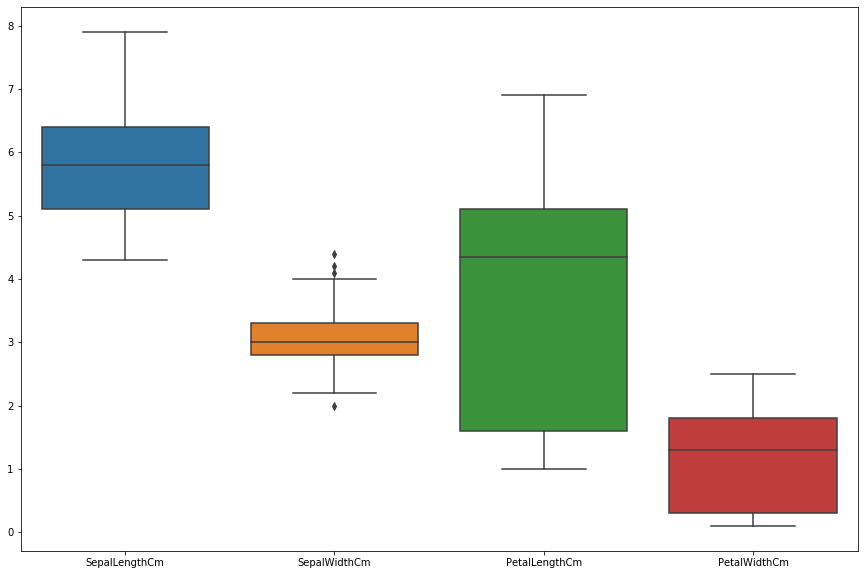

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=x)

***INFERENCE- There are no outliers present in our data according to boxplot***

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(334.8, 498.3, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(251.10000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(418.5, 407.70000000000005, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(167.4, 317.1, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(83.7, 226.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(251.10000000000002, 226.5, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(167.4, 135.89999999999998, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(83.7, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(334.8, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(669.6, 317.1, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(585.9, 226.5, 'X[1] <= 3.1\ngini = 

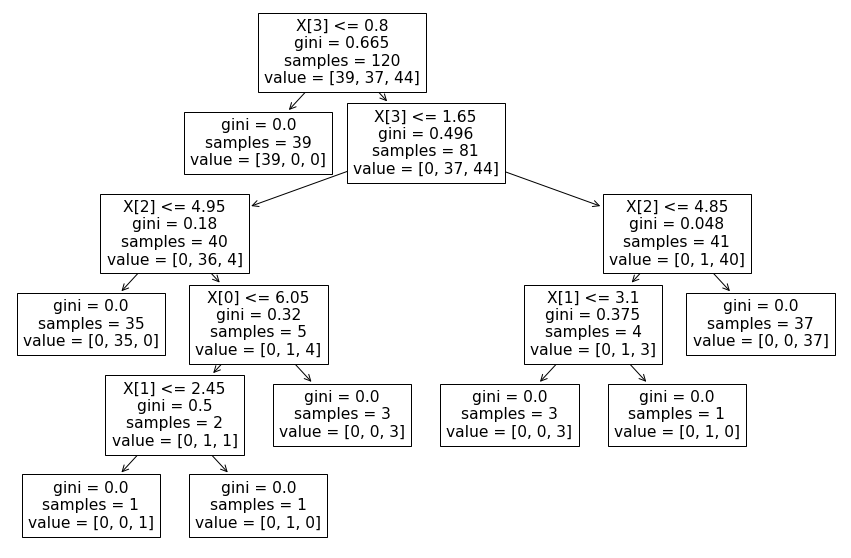

In [14]:
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(dt)

In [15]:
from sklearn.metrics import classification_report
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [19]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**INFERENCE: There is high correlation between the variables**

In [40]:
from sklearn.model_selection import cross_val_score, KFold   
from sklearn.metrics import f1_score,make_scorer             
kfold=KFold(n_splits=5,shuffle=True)                       


scorer = make_scorer(f1_score, average = 'weighted')

score=cross_val_score(dt,x_train,y_train,cv=kfold,scoring=scorer)

In [47]:
print('bias_err', 1-np.mean(score))


bias_err 0.08481957083737268


In [42]:
np.mean(score)

0.9151804291626273

In [46]:
print('standard_err',np.std(score))


standard_err 0.059163132838443606


In [45]:
print('Variance Error',np.var(score))  

Variance Error 0.003500276287259324
